# Regression Loss Functions

A regression predictive modelling problem involves predicting a real-valued quantity.
In this section, we will investigate loss functions that are appropriate for regression predictive modelling problems.
As the context for this investigation, we will use a standard regression problem generator provided by the scikit-learn library in the make_regression() function. This function will generate examples from a simple regression problem with a given number of input variables, statistical noise, and other properties.
We will use this function to define a problem that has 20 input features; 10 of the features will be meaningful and 10 will not be relevant. A total of 1,000 examples will be randomly generated. The pseudorandom number generator will be fixed to ensure that we get the same 1,000 examples each time the code is run.<br>
			
Neural networks generally perform better when the real-valued input and output variables are to be scaled to a sensible range. For this problem, each of the input variables and the target variable have a Gaussian distribution; therefore, standardizing the data in this case is desirable.
We can achieve this using the StandardScaler transformer class also from the scikit-learn library. On a real problem, we would prepare the scaler on the training dataset and apply it to the train and test sets, but for simplicity, we will scale all of the data together before splitting into train and test sets.
			
Once scaled, the data will be split evenly into train and test sets.
			
A small Multilayer Perceptron (MLP) model will be defined to address this problem and provide the basis for exploring different loss functions.
The model will expect 20 features as input as defined by the problem. The model will have one hidden layer with 25 nodes and will use the rectified linear activation function (ReLU). The output layer will have 1 node, given the one real-value to be predicted, and will use the linear activation function.
			
The model will be fit with stochastic gradient descent with a learning rate of 0.01 and a momentum of 0.9, both sensible default values.
Training will be performed for 100 epochs and the test set will be evaluated at the end of each epoch so that we can plot learning curves at the end of the run.
			
Now that we have the basis of a problem and model, we can take a look evaluating three common loss functions that are appropriate for a regression predictive modeling problem.
Although an MLP is used in these examples, the same loss functions can be used when training CNN and RNN models for regression.


In [ ]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='...', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

## Mean Squared Error Loss

The Mean Squared Error, or MSE, loss is the default loss to use for regression problems.<br>
Mathematically, it is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.<br>
Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.<br>
The mean squared error loss function can be used in Keras by specifying ‘mse‘ or ‘mean_squared_error‘ as the loss function when compiling the model.<br>

It is recommended that the output layer has one node for the target variable and the linear activation function is used.

A line plot is also created showing the mean squared error loss over the training epochs for both the train (blue) and test (orange) sets.<br>
We can see that the model converged reasonably quickly and both train and test performance remained equivalent. The performance and convergence behavior of the model suggest that mean squared error is a good match for a neural network learning this problem.

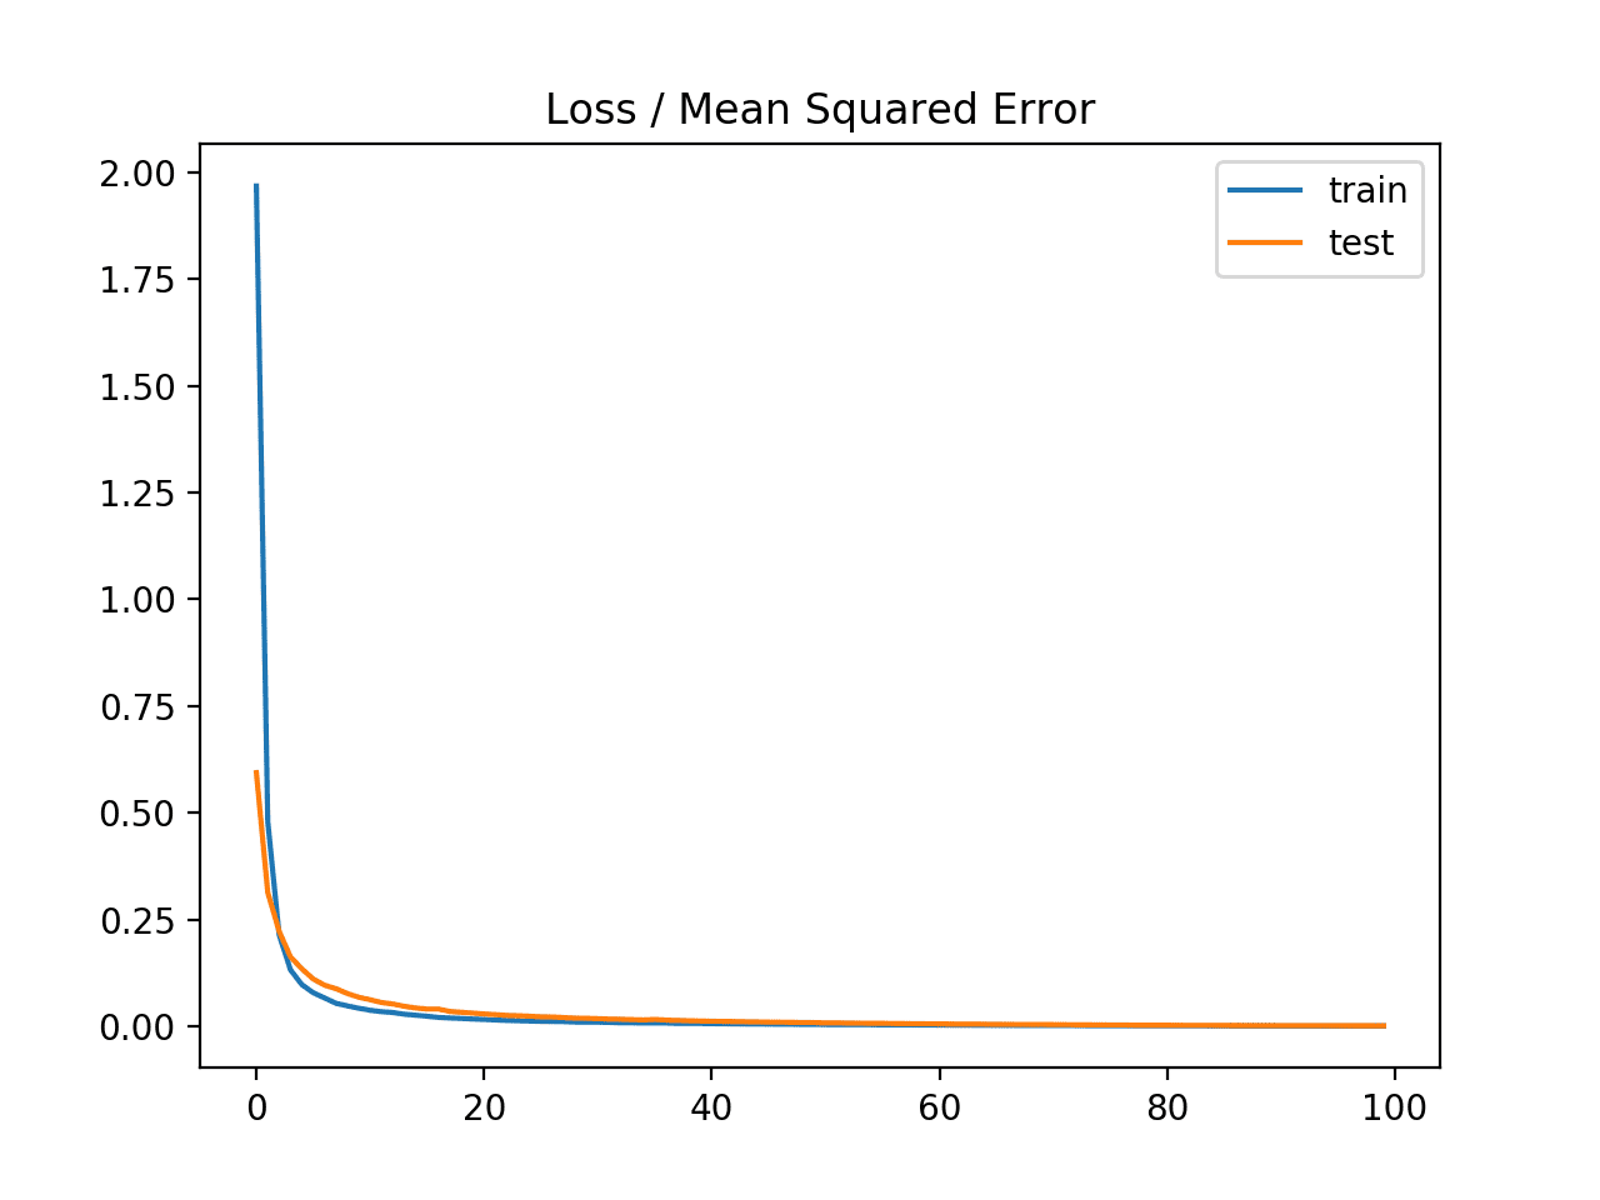
		
Line plot of Mean Squared Error Loss over Training Epochs When Optimizing the Mean Squared Error Loss Function

In [ ]:
model.compile(loss='mean_squared_error')
model.add(Dense(1, activation='linear'))

## Mean Squared Logarithmic Error Loss

There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.<br>
Instead, you can first calculate the natural logarithm of each of the predicted values, then calculate the mean squared error. This is called the Mean Squared Logarithmic Error loss, or MSLE for short.<br>
It has the effect of relaxing the punishing effect of large differences in large predicted values.<br>
As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly. Nevertheless, we can demonstrate this loss function using our simple regression problem.<br>
The model can be updated to use the ‘mean_squared_logarithmic_error‘ loss function and keep the same configuration for the output layer. We will also track the mean squared error as a metric when fitting the model so that we can use it as a measure of performance and plot the learning curve.<br>

A line plot is also created showing the mean squared logarithmic error loss over the training epochs for both the train (blue) and test (orange) sets (top), and a similar plot for the mean squared error (bottom).<br>
We can see that the MSLE converged well over the 100 epochs algorithm; it appears that the MSE may be showing signs of overfitting the problem, dropping fast and starting to rise from epoch 20 onwards.<br>

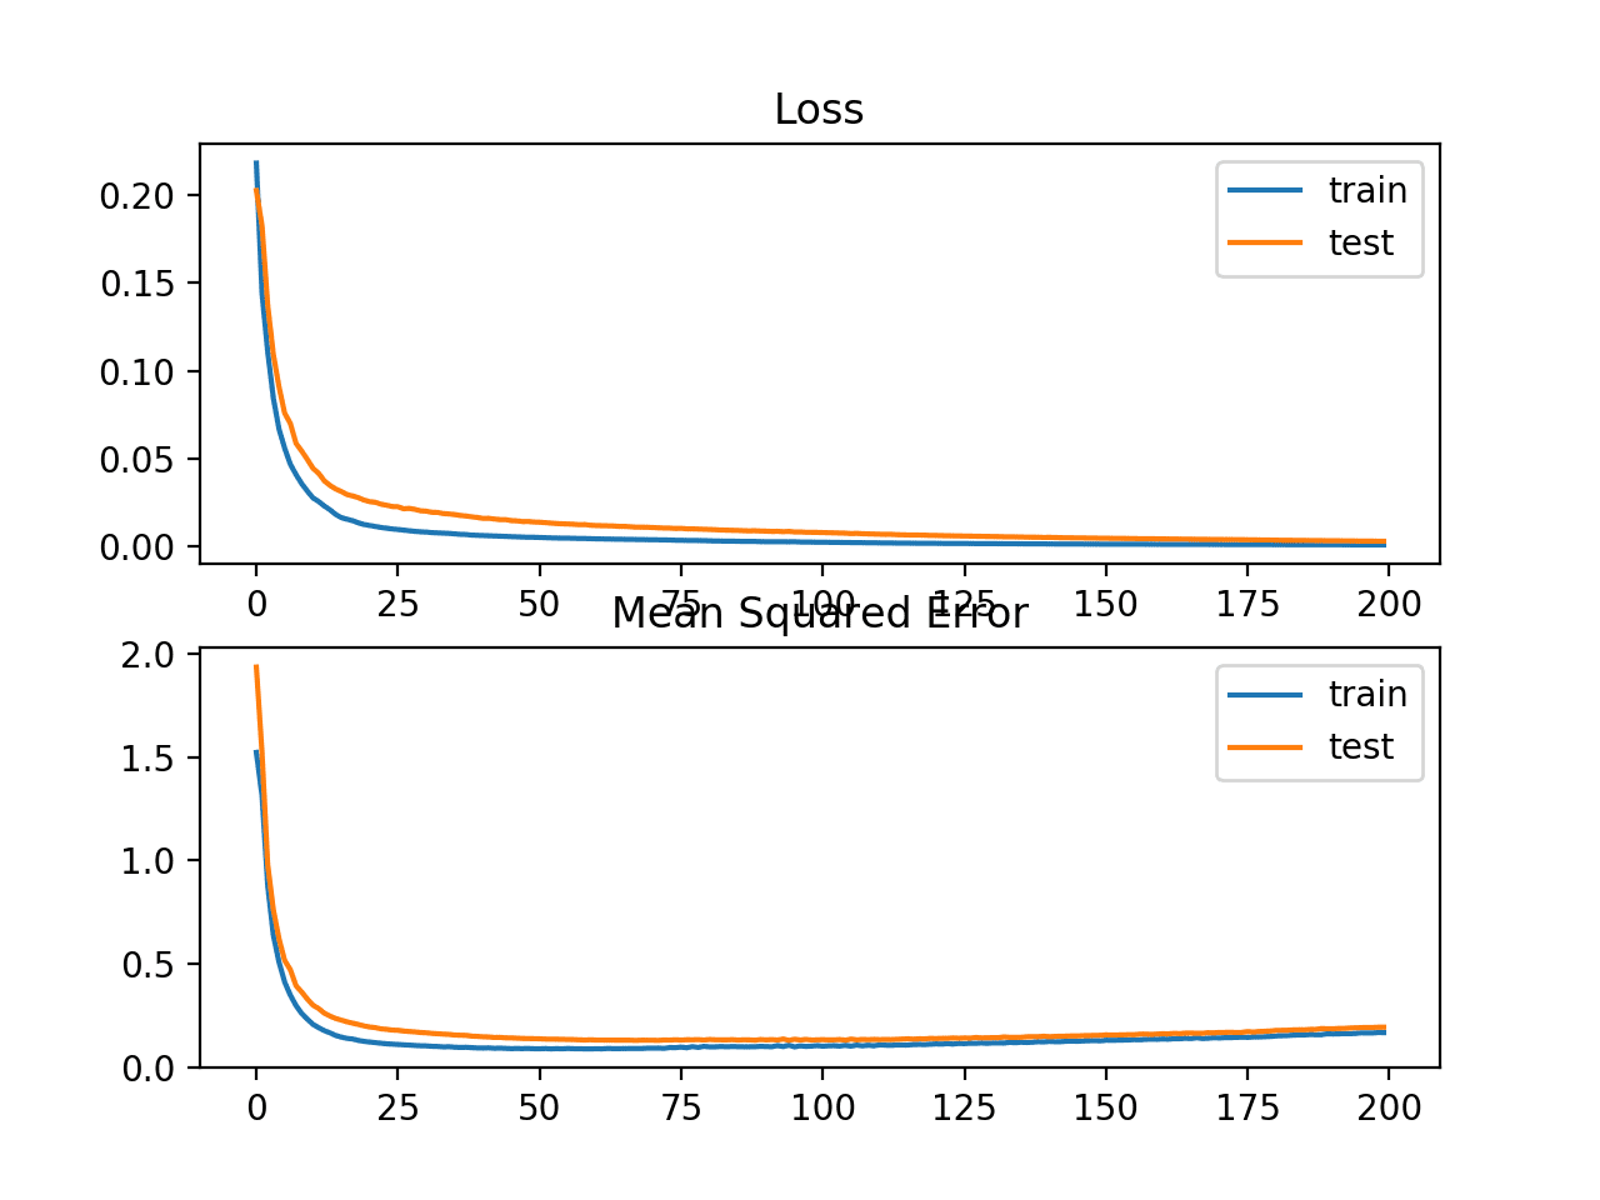

Line Plots of Mean Squared Logarithmic Error Loss and Mean Squared Error Over Training Epochs

In [ ]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

## Mean Absolute Error Loss

On some regression problems, the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value.<br>
The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it is more robust to outliers. It is calculated as the average of the absolute difference between the actual and predicted values.<br>
The model can be updated to use the ‘mean_absolute_error‘ loss function and keep the same configuration for the output layer.<br>

In this case, we can see that the model learned the problem, achieving a near zero error, at least to three decimal places.<br>
line plot is also created showing the mean absolute error loss over the training epochs for both the train (blue) and test (orange) sets (top), and a similar plot for the mean squared error (bottom).<br>
In this case, we can see that MAE does converge but shows a bumpy course, although the dynamics of MSE don’t appear greatly affected. We know that the target variable is a standard Gaussian with no large outliers, so MAE would not be a good fit in this case.<br>
It might be more appropriate on this problem if we did not scale the target variable first.<br>

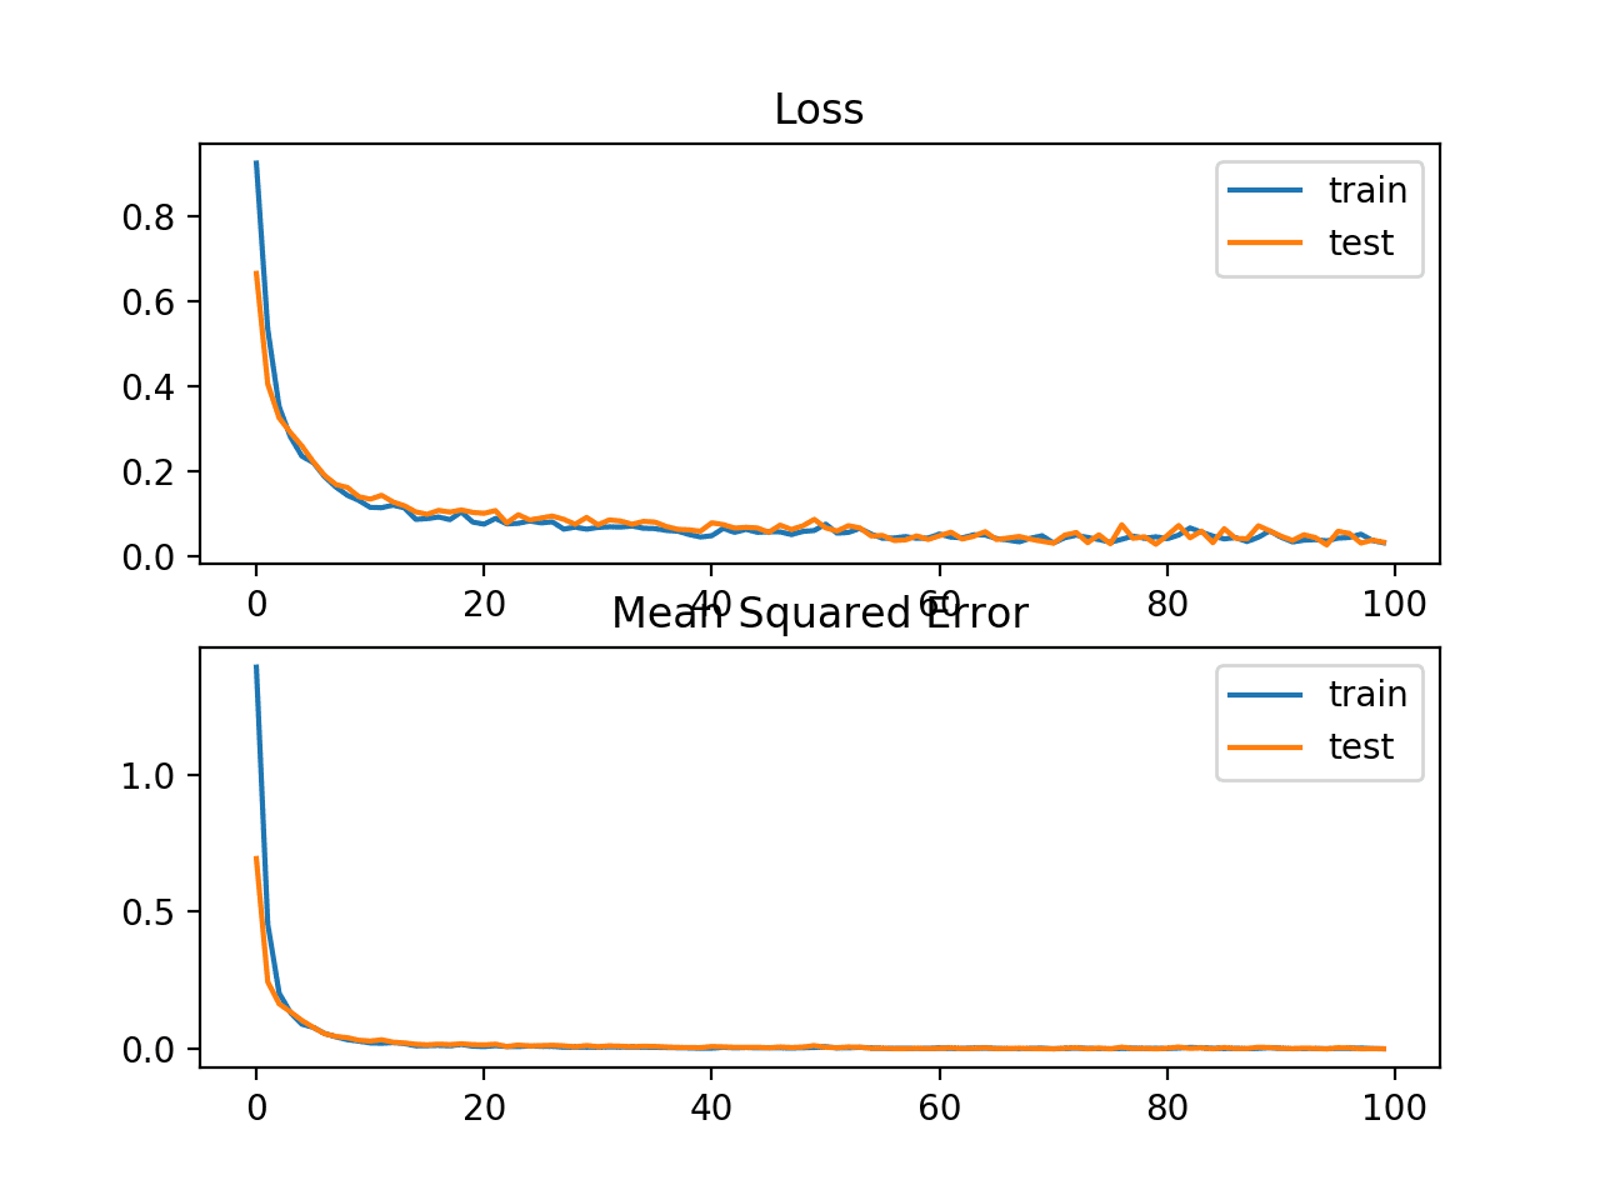

Line plots of Mean Absolute Error Loss and Mean Squared Error over Training Epochs

In [ ]:
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# Binary Classification Loss Functions

Binary classification are those predictive modeling problems where examples are assigned one of two labels.<br>
The problem is often framed as predicting a value of 0 or 1 for the first or second class and is often implemented as predicting the probability of the example belonging to class value 1.<br>
In this section, we will investigate loss functions that are appropriate for binary classification predictive modelling problems.<br>
We will generate examples from the circles test problem in scikit-learn as the basis for this investigation. The circles problem involves samples drawn from two concentric circles on a two-dimensional plane, where points on the outer circle belong to class 0 and points for the inner circle belong to class 1. Statistical noise is added to the samples to add ambiguity and make the problem more challenging to learn.<br>

Running the example creates a scatter plot of the examples, where the input variables define the location of the point and the class value defines the colour, with class 0 blue and class 1 orange

In [ ]:
# We will generate 1,000 examples and add 10% statistical noise. 
# The pseudorandom number generator will be seeded with the same value to ensure that we always get the same 1,000 examples.
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# We can create a scatter plot of the dataset to get an idea of the problem we are modeling. The complete example is listed below.
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
    pyplot.legend()
    pyplot.show()

# The points are already reasonably scaled around 0, almost in [-1,1]. We won’t rescale them in this case.
# The dataset is split evenly for train and test sets.
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# A simple MLP model can be defined to address this problem that expects two inputs for the two features in the dataset, 
# a hidden layer with 50 nodes, a rectified linear activation function and an output layer that will need to be configured 
# for the choice of loss function.

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='...'))
# The model will be fit using stochastic gradient descent with the sensible default learning rate of 0.01 and momentum of 0.9.
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='...', optimizer=opt, metrics=['accuracy'])
# We will fit the model for 200 training epochs and evaluate the performance of the model against the loss and accuracy at the end of each epoch so that we can plot learning curves.
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# Now that we have the basis of a problem and model, 
# we can take a look evaluating three common loss functions that are appropriate for a binary classification predictive modeling problem.
# Although an MLP is used in these examples, the same loss functions can be used when training CNN and RNN models for binary classification.

## Binary Cross-Entropy Loss
Cross-entropy is the default loss function to use for binary classification problems.<br>
It is intended for use with binary classification where the target values are in the set {0, 1}.<br>
Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.<br>
Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.<br>

Running the below example first prints the classification accuracy for the model on the train and test dataset.<br>
Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision.<br> Consider running the example a few times and compare the average outcome. <br>
In this case, we can see that the model learned the problem reasonably well, achieving about 83% accuracy on the training dataset and about 85% on the test dataset. The scores are reasonably close, suggesting the model is probably not over or underfit.<br>

A figure is also created showing two line plots, the top with the cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.<br>
The plot shows that the training process converged well. The plot for loss is smooth, given the continuous nature of the error between the probability distributions, whereas the line plot for accuracy shows bumps, given examples in the train and test set can ultimately only be predicted as correct or incorrect, providing less granular feedback on performance.<br>
	
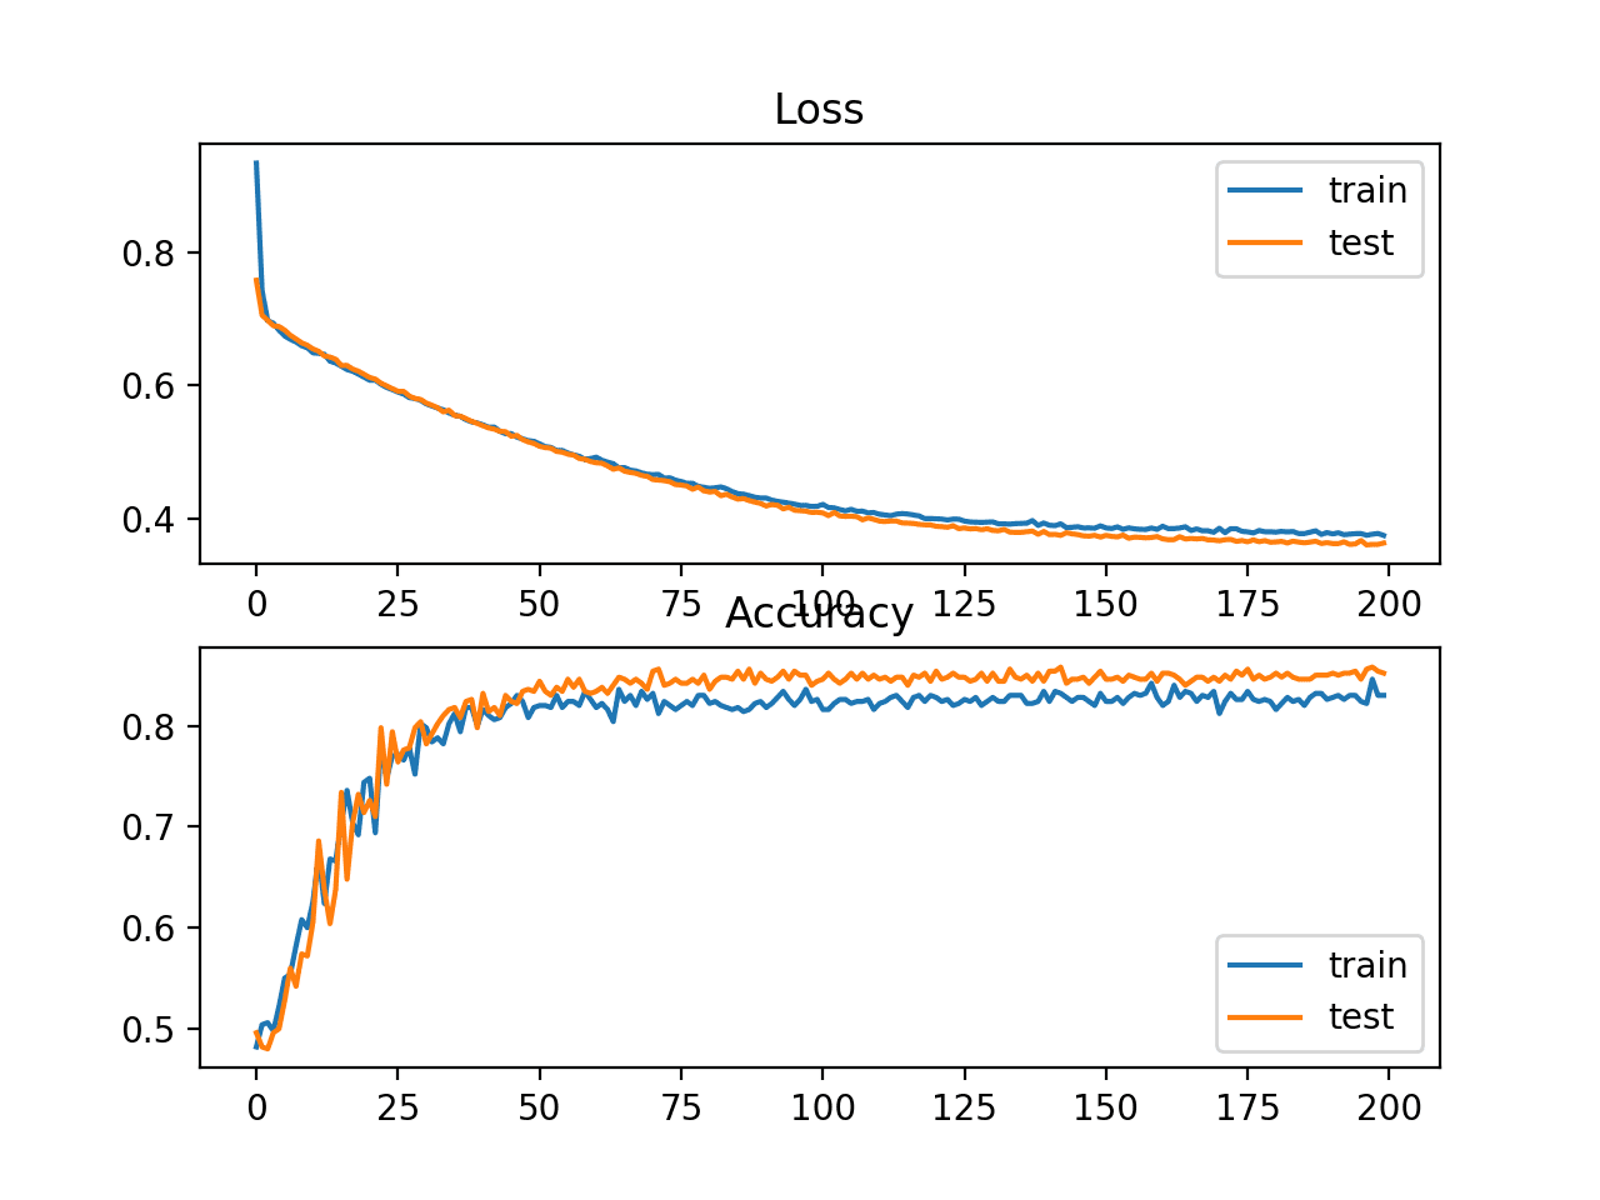
	
Line Plots of Cross Entropy Loss and Classification Accuracy over Training Epochs on the Two Circles Binary Classification Problem


In [ ]:
# Cross-entropy can be specified as the loss function in Keras by specifying ‘binary_crossentropy‘ when compiling the model.
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# The function requires that the output layer is configured with a single node and a ‘sigmoid‘ activation 
# in order to predict the probability for class 1.
model.add(Dense(1, activation='sigmoid'))
# The complete example of an MLP with cross-entropy loss for the two circles binary classification problem is listed below.
# mlp for the circles problem with cross entropy loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Train: 0.836, Test: 0.852

## Hinge Loss
An alternative to cross-entropy for binary classification problems is the hinge loss function, primarily developed for use with Support Vector Machine (SVM) models.<br>
It is intended for use with binary classification where the target values are in the set {-1, 1}.<br>
The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.<br>
Reports of performance with the hinge loss are mixed, sometimes resulting in better performance than cross-entropy on binary classification problems.<br>

Running the below example first prints the classification accuracy for the model on the train and test dataset.<br>
Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.<br>
In this case, we can see slightly worse performance than using cross-entropy, with the chosen model configuration with less than 80% accuracy on the train and test sets.<br>
A figure is also created showing two line plots, the top with the hinge loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.<br>
The plot of hinge loss shows that the model has converged and has reasonable loss on both datasets. The plot of classification accuracy also shows signs of convergence, albeit at a lower level of skill than may be desirable on this problem.

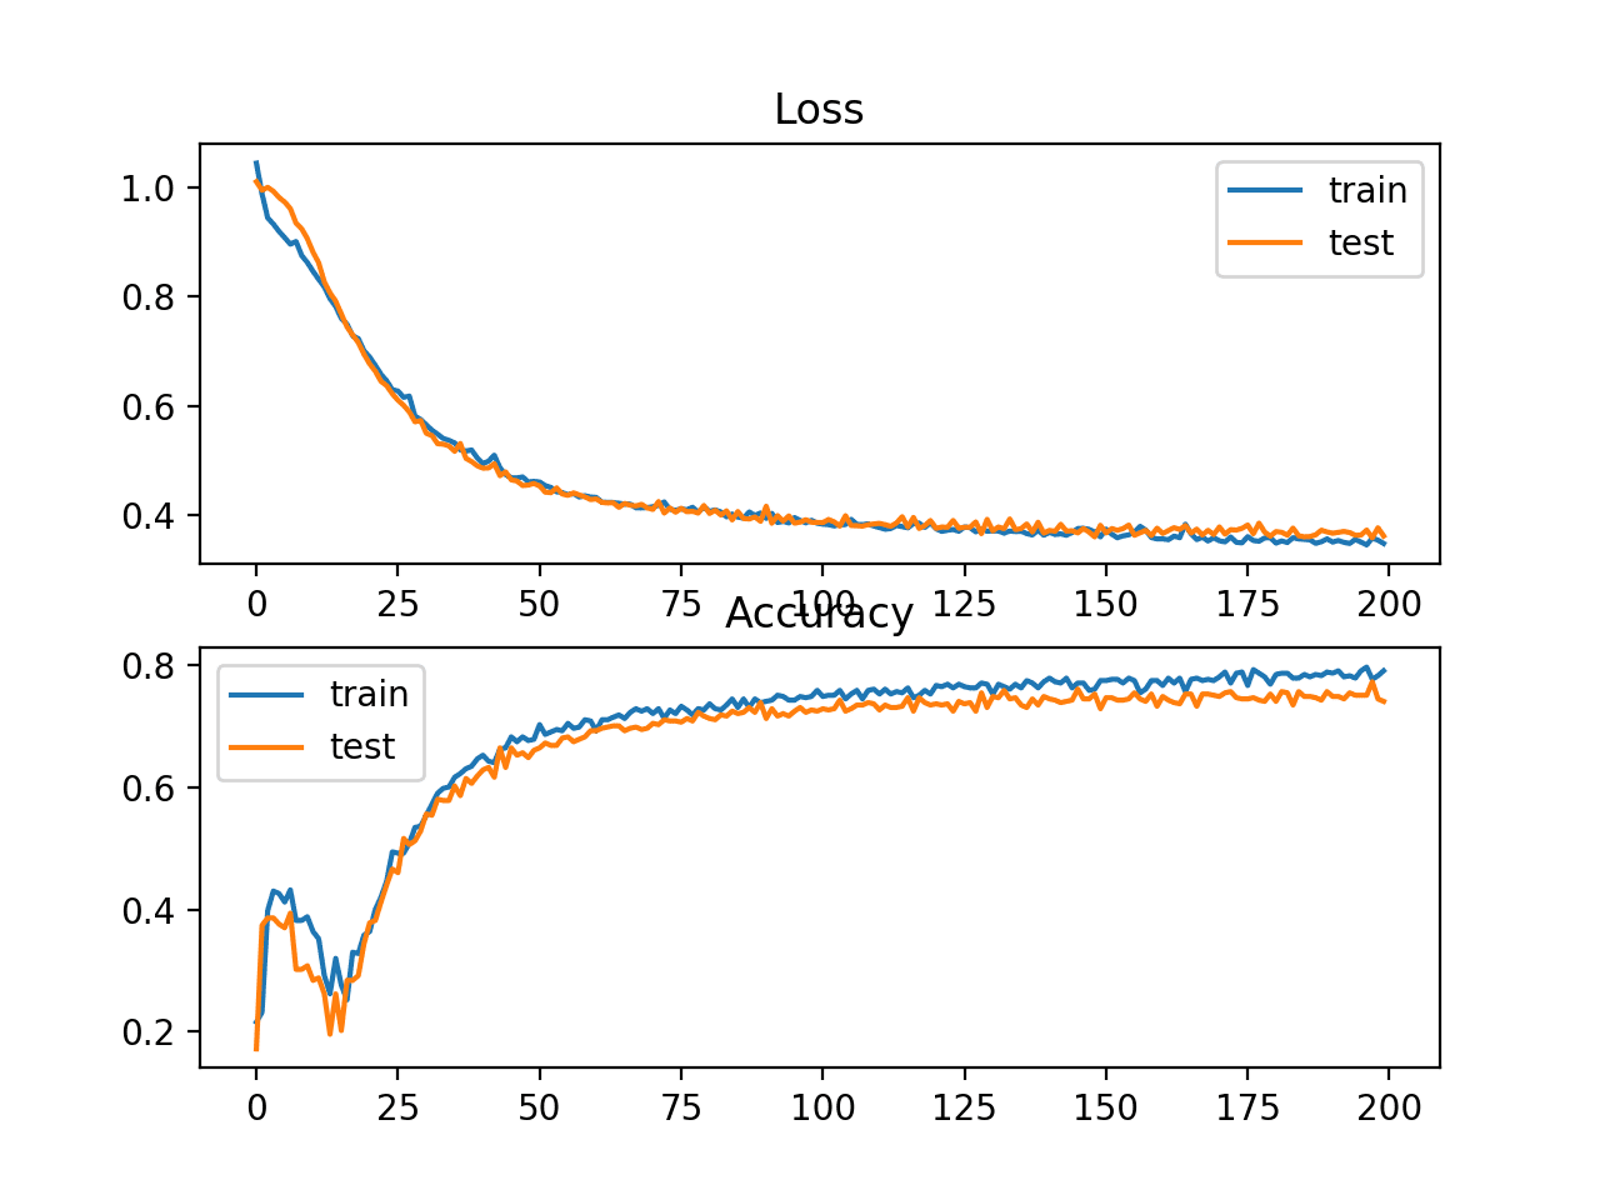

Line Plots of Hinge Loss and Classification Accuracy over Training Epochs on the Two Circles Binary Classification Problem


In [ ]:
# Firstly, the target variable must be modified to have values in the set {-1, 1}.
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# The hinge loss function can then be specified as the ‘hinge‘ in the compile function.
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# Finally, the output layer of the network must be configured to have a single node with a hyperbolic tangent activation function capable of outputting a single value in the range [-1, 1].
model.add(Dense(1, activation='tanh'))
# The complete example of an MLP with a hinge loss function for the two circles binary classification problem is listed below.
# mlp for the circles problem with hinge loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Train: 0.792, Test: 0.740

## Squared Hinge Loss

The hinge loss function has many extensions, often the subject of investigation with SVM models.<br>
A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.<br>
If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.<br>
Running the example first prints the classification accuracy for the model on the train and test datasets.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision.<br> Consider running the example a few times and compare the average outcome.<br>
In this case, we can see that for this problem and the chosen model configuration, the hinge squared loss may not be appropriate, resulting in classification accuracy of less than 70% on the train and test sets.<br>

A figure is also created showing two line plots, the top with the squared hinge loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.<br>
The plot of loss shows that indeed, the model converged, but the shape of the error surface is not as smooth as other loss functions where small changes to the weights are causing large changes in loss.<br>

| 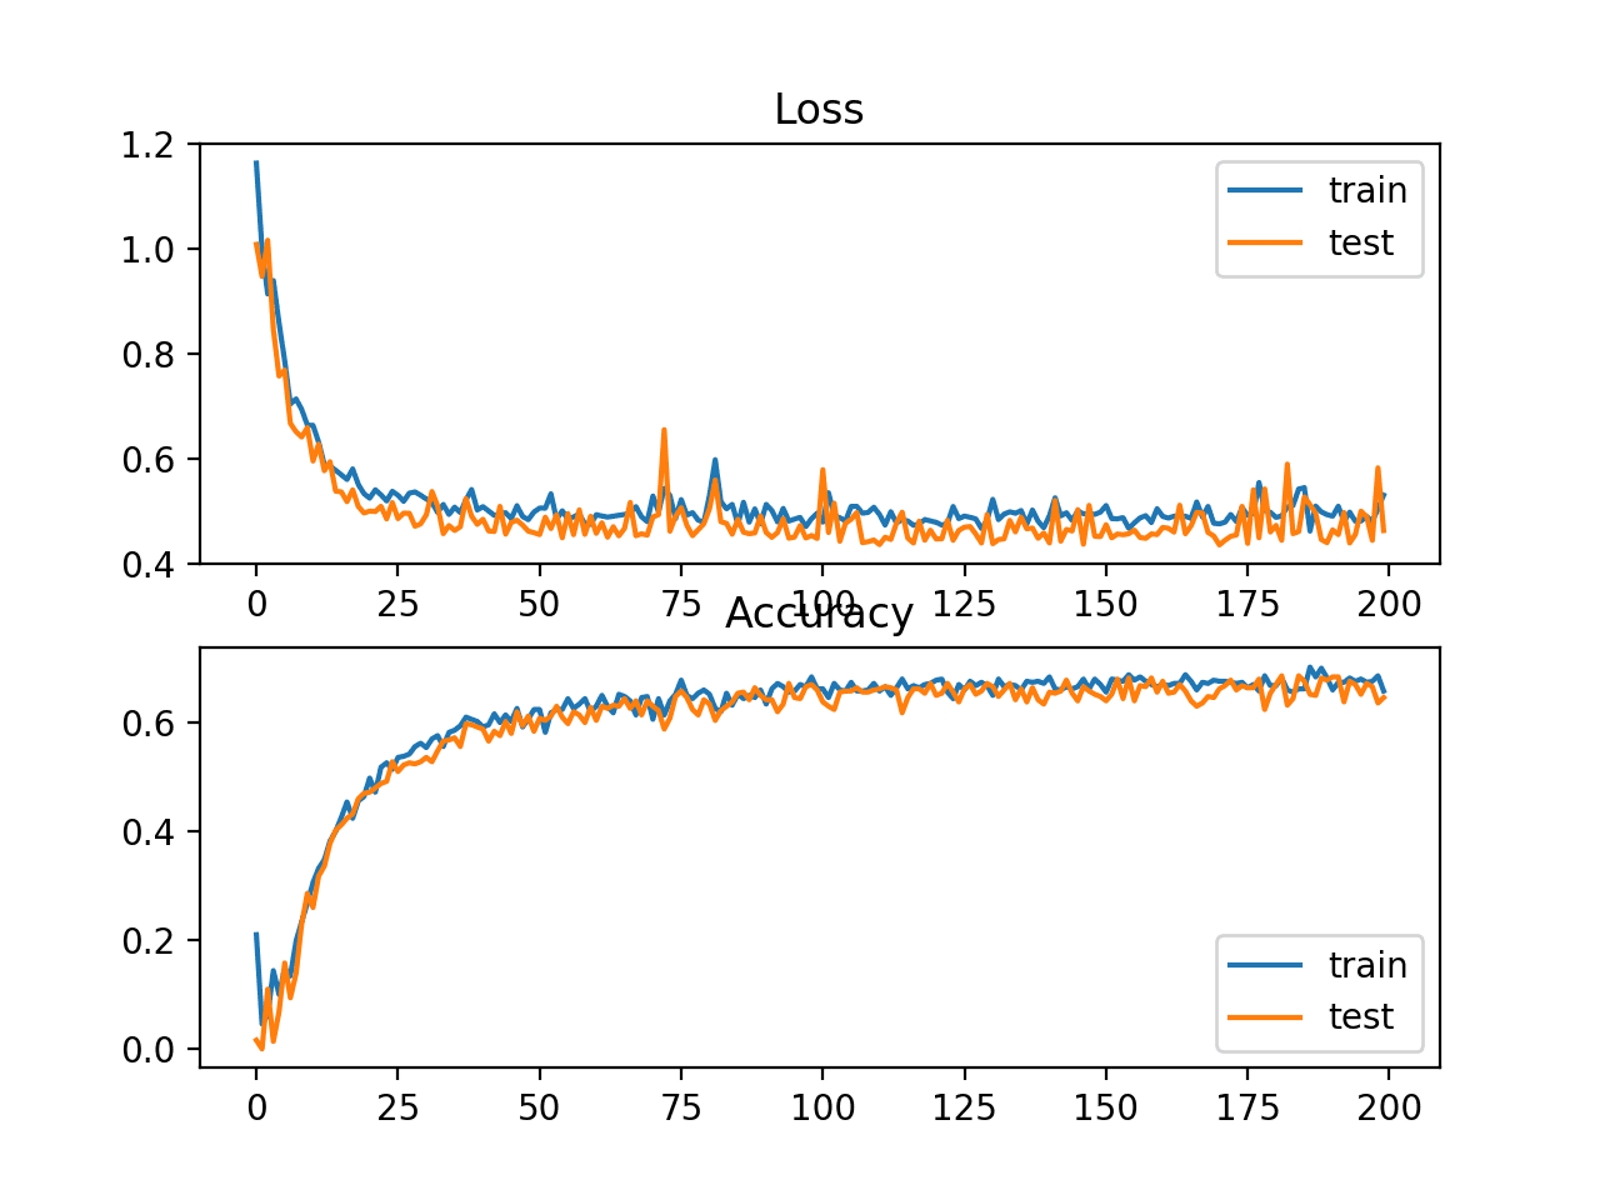 |
|:--:|
|*Line Plots of Squared Hinge Loss and Classification Accuracy over Training Epochs on the Two Circles Binary Classification Problem*|


In [ ]:
# As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# The squared hinge loss can be specified as ‘squared_hinge‘ in the compile() function when defining the model.
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# And finally, the output layer must use a single node with a hyperbolic tangent activation function capable of outputting continuous values in the range [-1, 1].
model.add(Dense(1, activation='tanh'))
# The complete example of an MLP with the squared hinge loss function on the two circles binary classification problem is listed below.
# mlp for the circles problem with squared hinge loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
# Train: 0.682, Test: 0.646

# Multi-Class Classification Loss Functions

Multi-Class classification are those predictive modelling problems where examples are assigned one of more than two classes.<br>
The problem is often framed as predicting an integer value, where each class is assigned a unique integer value from 0 to (num_classes – 1). The problem is often implemented as predicting the probability of the example belonging to each known class.<br>
In this section, we will investigate loss functions that are appropriate for multi-class classification predictive modeling problems.

Running the example creates a scatter plot showing the 1,000 examples in the dataset with examples belonging to the 0, 1, and 2 classes colors blue, orange, and green respectively.
				
|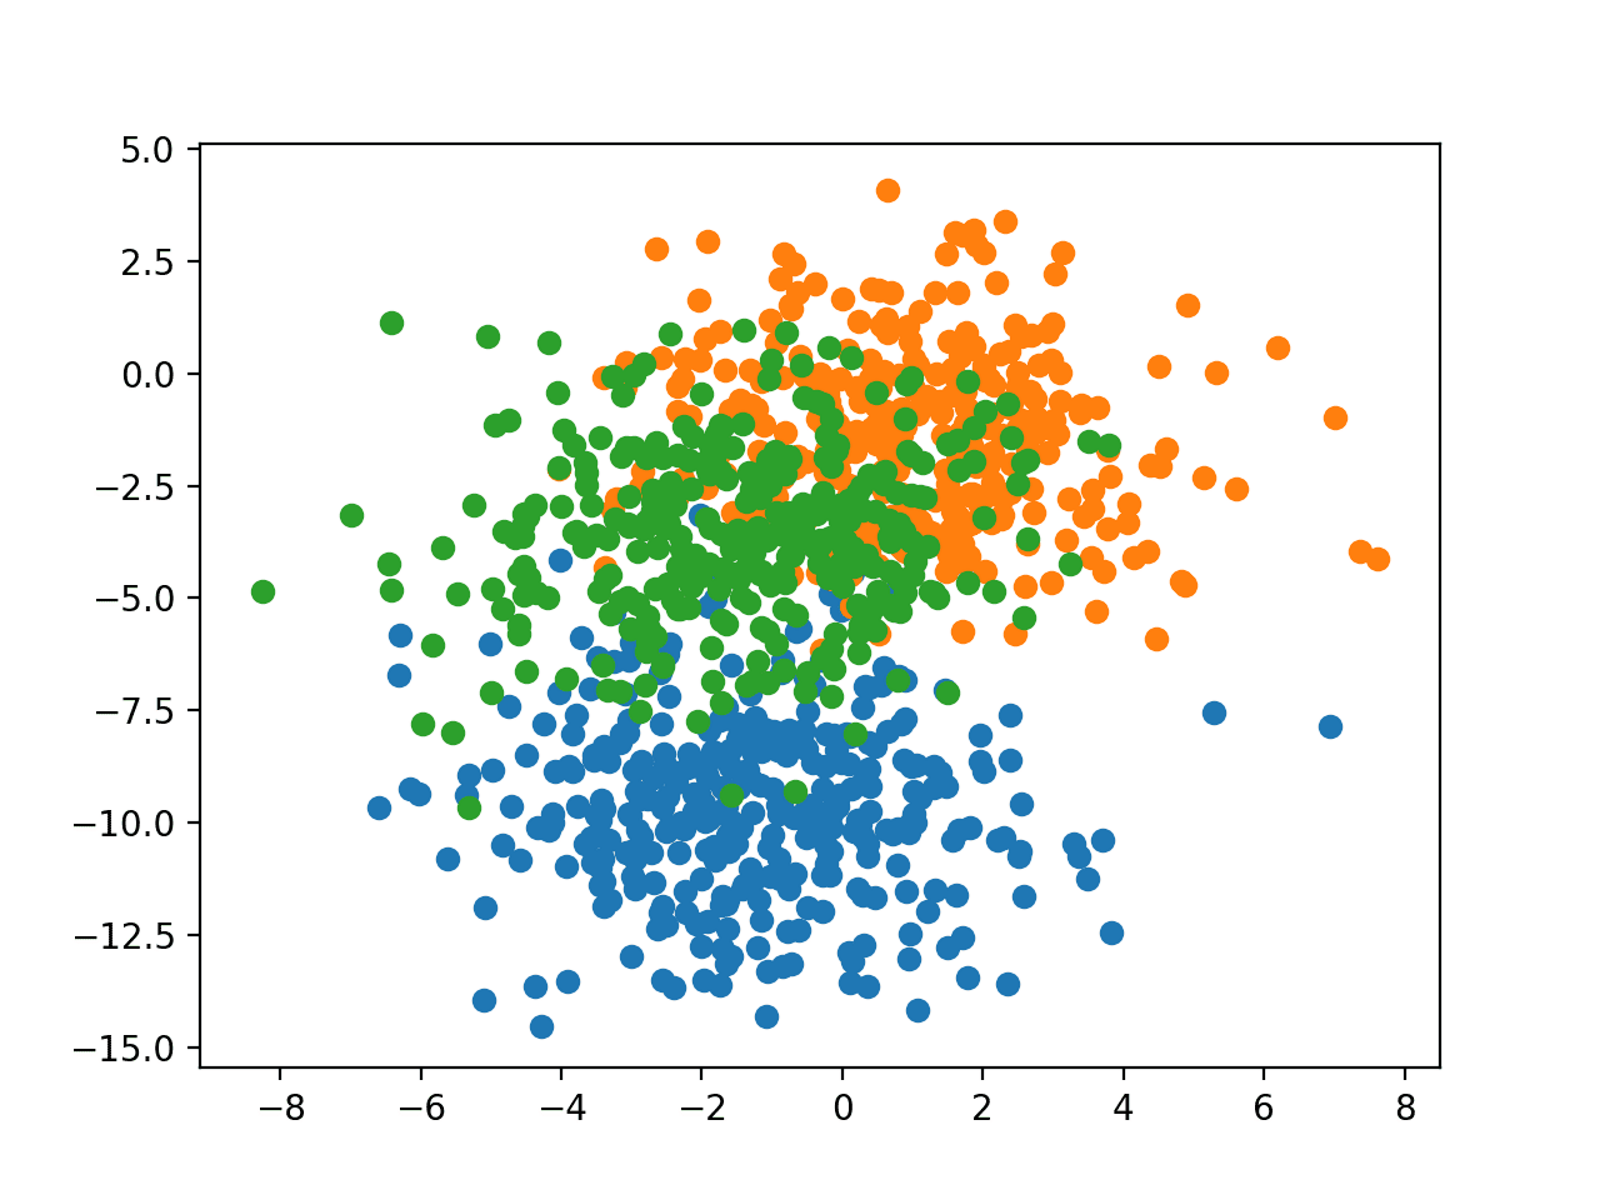|
|:--:|
|*Scatter Plot of Examples Generated from the Blobs Multi-Class Classification Problem*|

In [ ]:
# We will use the blobs problem as the basis for the investigation. 
# The make_blobs() function provided by the scikit-learn 
# provides a way to generate examples given a specified number of classes and input features. 
# We will use this function to generate 1,000 examples for a 3-class classification problem with 2 input variables. 
# The pseudorandom number generator will be seeded consistently so that the same 1,000 examples are generated each time the code is run.
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# The two input variables can be taken as x and y coordinates for points on a two-dimensional plane.
# The example below creates a scatter plot of the entire dataset coloring points by their class membership.
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from numpy import where
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
    pyplot.show()

# The input features are Gaussian and could benefit from standardization; 
# nevertheless, we will keep the values unscaled in this example for brevity.
# The dataset will be split evenly between train and test sets.
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# A small MLP model will be used as the basis for exploring loss functions.
# The model expects two input variables, has 50 nodes in the hidden layer and the rectified linear activation function, and an output layer that must be customized based on the selection of the loss function.
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(..., activation='...'))
# The model is fit using stochastic gradient descent with a sensible default learning rate of 0.01 and a momentum of 0.9.
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='...', optimizer=opt, metrics=['accuracy'])
# The model will be fit for 100 epochs on the training dataset and the test dataset will be used as a validation dataset, allowing us to evaluate both loss and classification accuracy on the train and test sets at the end of each training epoch and draw learning curves.
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# Now that we have the basis of a problem and model, 
# we can take a look evaluating three common loss functions that are appropriate for a multi-class classification predictive modeling problem.
# Although an MLP is used in these examples, the same loss functions can be used when training CNN and RNN models for multi-class classification.


## Multi-Class Cross-Entropy Loss
Cross-entropy is the default loss function to use for multi-class classification problems.<br>
In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.<br>
Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.<br>
Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.<br>
Cross-entropy can be specified as the loss function in Keras by specifying ‘categorical_crossentropy‘ when compiling the model.<br>

```model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])```

The function requires that the output layer is configured with an n nodes (one for each class), in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class.

`model.add(Dense(3, activation='softmax'))`

In turn, this means that the target variable must be one hot encoded.
This is to ensure that each example has an expected probability of 1.0 for the actual class value and an expected probability of 0.0 for all other class values. This can be achieved using the to_categorical() Keras function.

```
# one hot encode output variable
y = to_categorical(y)
```

Running the example first prints the classification accuracy for the model on the train and test dataset.<br>
Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.<br>
In this case, we can see the model performed well, achieving a classification accuracy of about 84% on the training dataset and about 82% on the test dataset.<br>

A figure is also created showing two line plots, the top with the cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.<br>
In this case, the plot shows the model seems to have converged. The line plots for both cross-entropy and accuracy both show good convergence behavior, although somewhat bumpy. The model may be well configured given no sign of over or under fitting. The learning rate or batch size may be tuned to even out the smoothness of the convergence in this case.<br>

|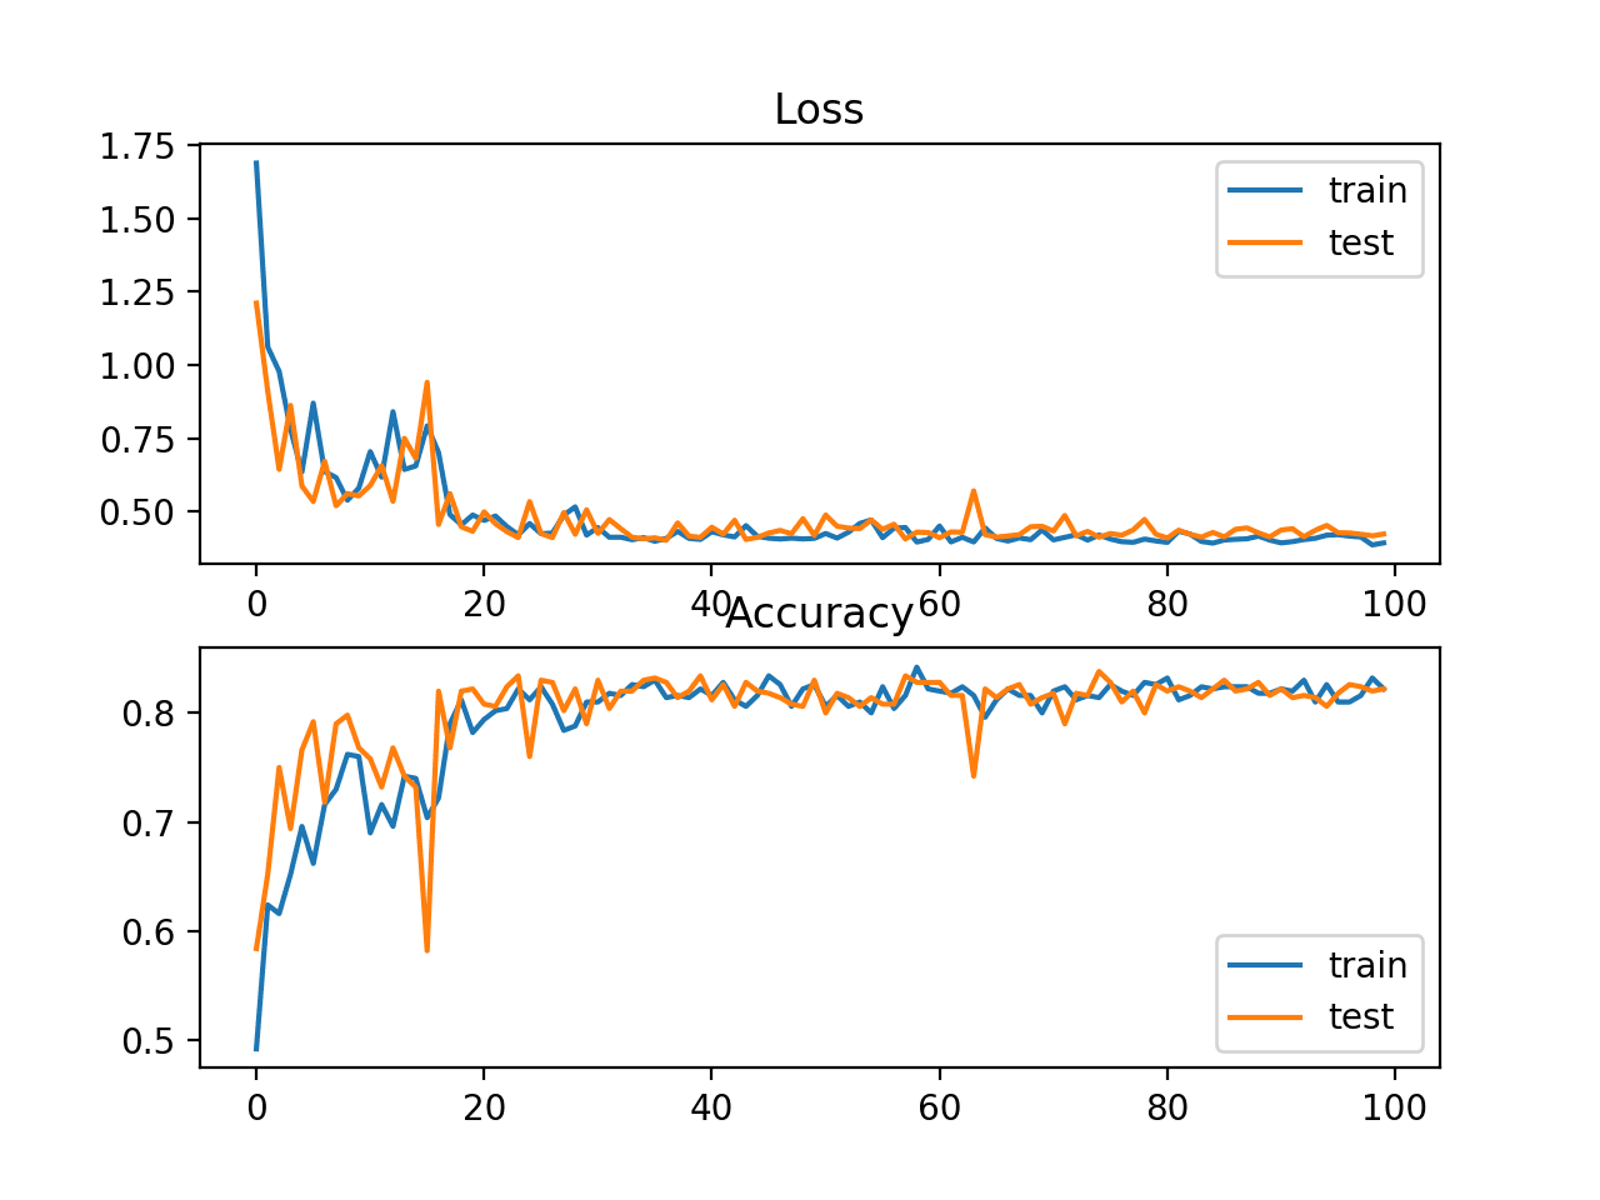|
|:--:|
|*Line Plots of Cross Entropy Loss and Classification Accuracy over Training Epochs on the Blobs Multi-Class Classification Problem*|

In [ ]:
# The complete example of an MLP with cross-entropy loss for the multi-class blobs classification problem is listed below.
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
# Train: 0.840, Test: 0.822

## Sparse Multiclass Cross-Entropy Loss

A possible cause of frustration when using cross-entropy with classification problems with a large number of labels is the one hot encoding process.<br>
For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.<br>
Sparse cross-entropy addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.<br>
Sparse cross-entropy can be used in keras for multi-class classification by using ‘sparse_categorical_crossentropy‘ when calling the compile() function.<br>

`model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])`

The function requires that the output layer is configured with an n nodes (one for each class), in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class.<br>

`model.add(Dense(3, activation='softmax'))`

No one hot encoding of the target variable is required, a benefit of this loss function.

Running the example first prints the classification accuracy for the model on the train and test dataset.<br>
Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.<br>
In this case, we can see the model achieves good performance on the problem. In fact, if you repeat the experiment many times, the average performance of sparse and non-sparse cross-entropy should be comparable.<br>

A figure is also created showing two line plots, the top with the sparse cross-entropy loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.<br>
In this case, the plot shows good convergence of the model over training with regard to loss and classification accuracy.<br>

|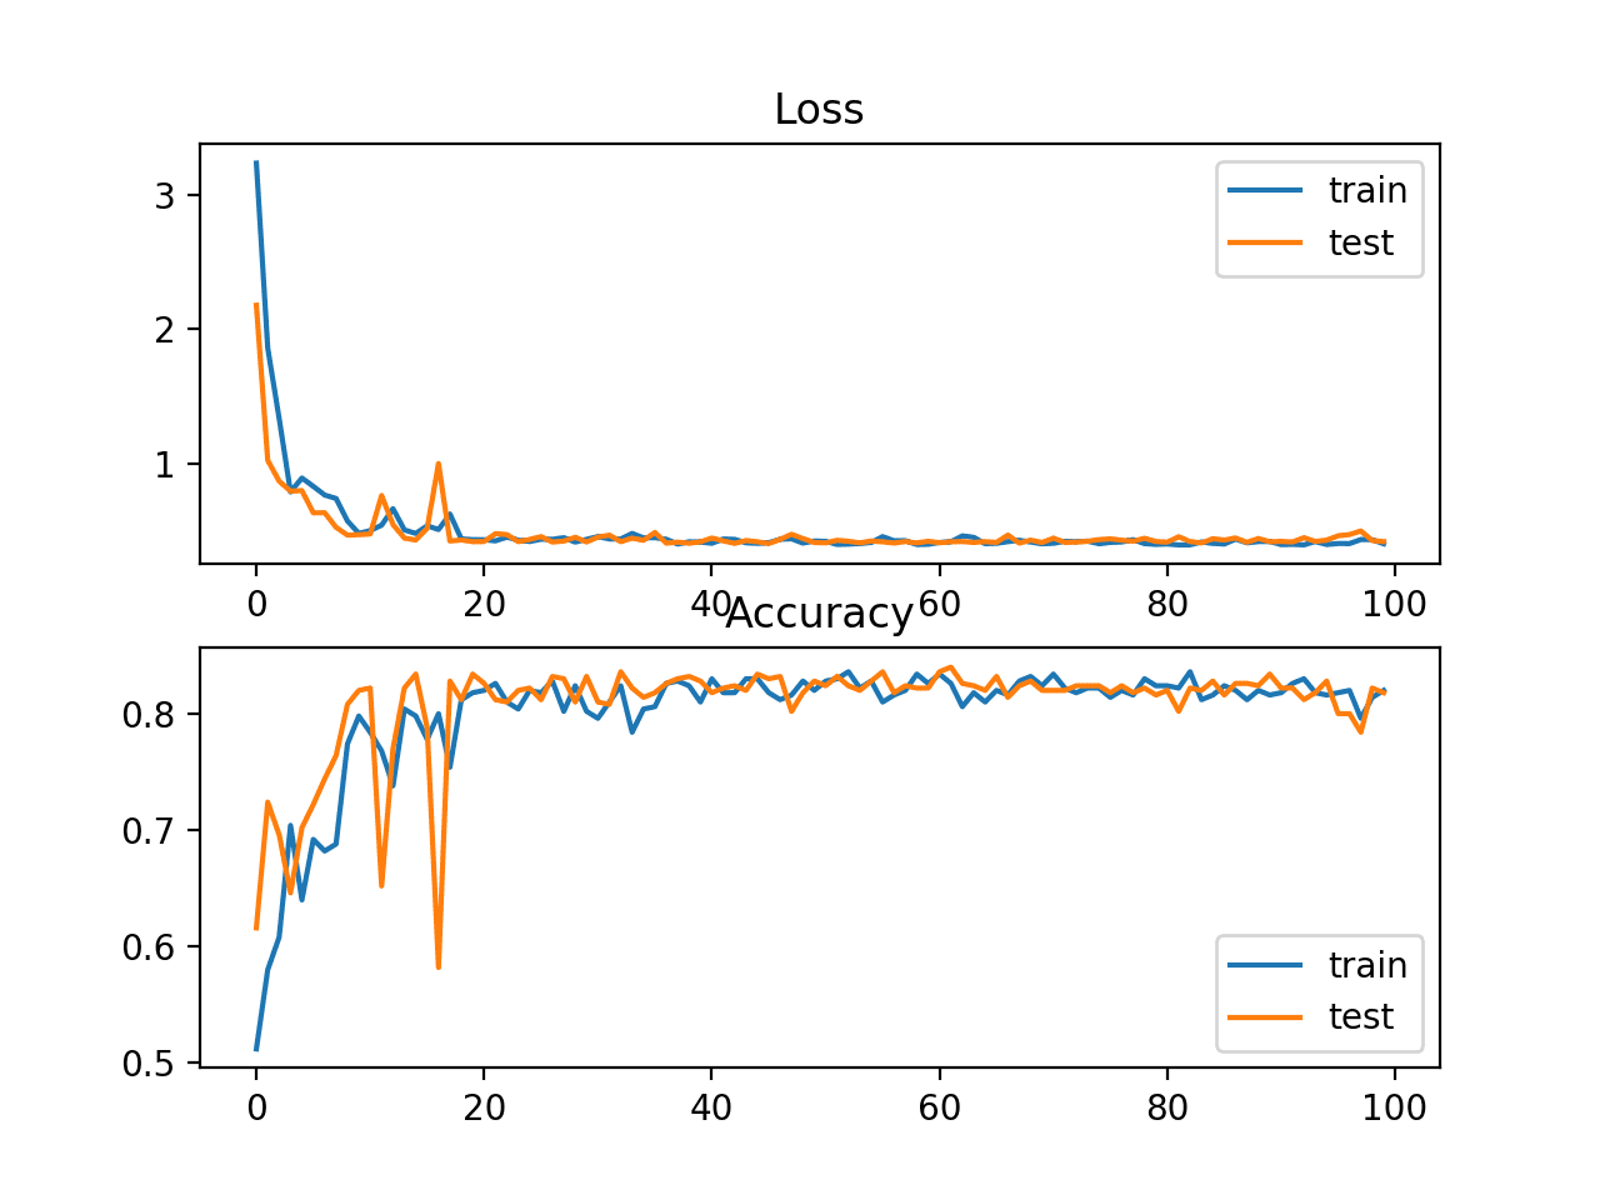|
|:--:|
|*Line Plots of Sparse Cross Entropy Loss and Classification Accuracy over Training Epochs on the Blobs Multi-Class Classification Problem*|

In [ ]:
# The complete example of training an MLP with sparse cross-entropy on the blobs multi-class classification problem is listed below.
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
# Train: 0.832, Test: 0.818

## Kullback Leibler Divergence Loss
Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.
A KL divergence loss of 0 suggests the distributions are identical. In practice, the behavior of KL Divergence is very similar to cross-entropy. It calculates how much information is lost (in terms of bits) if the predicted probability distribution is used to approximate the desired target probability distribution.<br>
As such, the KL divergence loss function is more commonly used when using models that learn to approximate a more complex function than simply multi-class classification, such as in the case of an autoencoder used for learning a dense feature representation under a model that must reconstruct the original input. In this case, KL divergence loss would be preferred. Nevertheless, it can be used for multi-class classification, in which case it is functionally equivalent to multi-class cross-entropy.<br>
KL divergence loss can be used in Keras by specifying ‘kullback_leibler_divergence‘ in the compile() function.<br>

```model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])```
As with cross-entropy, the output layer is configured with an n nodes (one for each class), in this case three nodes, and a ‘softmax‘ activation in order to predict the probability for each class.<br>
Also, as with categorical cross-entropy, we must one hot encode the target variable to have an expected probability of 1.0 for the class value and 0.0 for all other class values.<br>

```
# one hot encode output variable
y = to_categorical(y)
```

Running the example first prints the classification accuracy for the model on the train and test dataset.<br>
Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision.<br> Consider running the example a few times and compare the average outcome.<br>
In this case, we see performance that is similar to those results seen with cross-entropy loss, in this case about 82% accuracy on the train and test dataset.<br>
A figure is also created showing two line plots, the top with the KL divergence loss over epochs for the train (blue) and test (orange) dataset, and the bottom plot showing classification accuracy over epochs.<br>
In this case, the plot shows good convergence behavior for both loss and classification accuracy. It is very likely that an evaluation of cross-entropy would result in nearly identical behavior given the similarities in the measure.<br>

|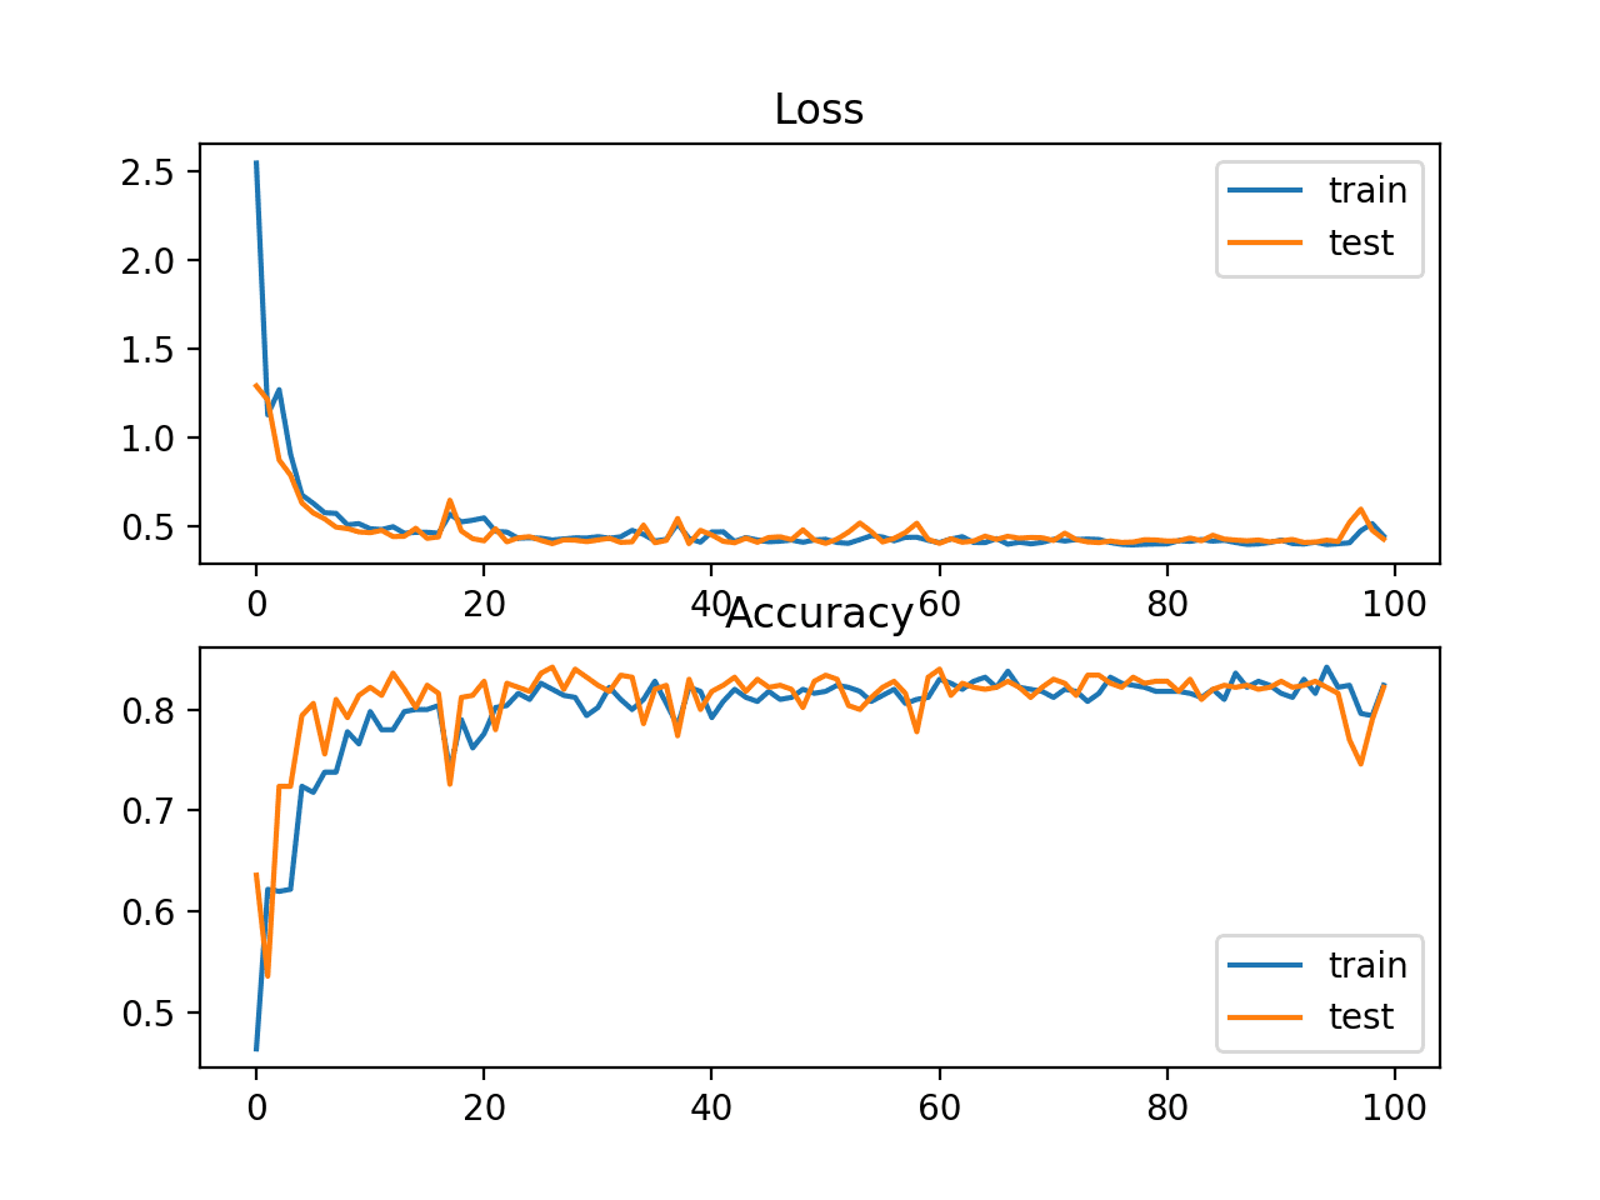|
|:--:|
|*Line Plots of KL Divergence Loss and Classification Accuracy over Training Epochs on the Blobs Multi-Class Classification Problem*|

In [ ]:
# The complete example of training an MLP with KL divergence loss for the blobs multi-class classification problem is listed below.
# mlp for the blobs multi-class classification problem with kl divergence loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
# Train: 0.822, Test: 0.822